# CWA Determination: Alternate Model

## Authenticate to Colab

In [ ]:
# AUTHENTICATE to Google Colab using your Colab credentials
from google.colab import auth
auth.authenticate_user()

## Mount GDrive

In [ ]:
# IMPORT & MOUNT gDrive so we can access files from here
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import Python Packages

In [ ]:
# install pickle5 
!pip3 install pickle5

# install xgboost
!pip install xgboost

# install iterative stratification
!pip install iterative-stratification

In [ ]:
import pandas as pd
from pandas import read_csv

import numpy as np
from numpy import isnan

import pickle5 as pickle
import os
import random

import matplotlib.pyplot as plt

from collections import Counter

import time

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import seaborn as sns

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.pipeline import Pipeline

# Set the randomizer seed so results are the same each time.
np.random.seed(123)

pd.set_option('display.float_format', '{:.2f}'.format)

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

## Load Data

In [ ]:
# Load Data

# 1 - Combined File
combined_df = pd.read_csv(r'/content/drive/MyDrive/Colab/Data/2021.03.09_ssurgo_nhd_merged.csv')

# 2 - Charleston-Wilmington files
df_89 = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/sac_saw_subset_01_89.csv")
df_1235 = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/sac_saw_subset_01_1235.csv")

# 3 - Full updated data set
full_df = pd.read_csv(r"/content/drive/MyDrive/Colab/Data/2021.03.17_full_dataset.csv")
# full_df = pd.read_csv(r"/content/drive/MyDrive/Colab/Data/2021.03.20_full_dataset.csv")


## Extract model data

In [ ]:
# Extract model data

# with big combined file
model_data = full_df.copy()

# for experimental set 1_089
# df_list = pd.DataFrame(df_89['da_number'])
# model_data = df_list.merge(full_df, on="da_number", how="left")

# for experimental set 1_1235
# df_list = pd.DataFrame(df_1235['da_number'])
# model_data = df_list.merge(full_df, on="da_number", how="left")

# Lat/Lon Feature Engineering
model_data['x_coord'] = np.cos(model_data['latitude']) * np.cos(model_data['longitude'])
model_data['y_coord'] = np.cos(model_data['latitude']) * np.sin(model_data['longitude'])
model_data['z_coord'] = np.sin(model_data['latitude'])

len(model_data["da_number"])

14619

## Prepare X, Y data

In [ ]:
Y = model_data[["cwa_determination"]]

X = model_data[['x_coord', 'y_coord', 'z_coord',
               'potential_wetland',
               'hydclprs', 
               'aws025wta',
               'slopegradd',
               'wtdepannmi',
               'flodfreqdc',
               'pondfreqpr',
               'wtdepaprju',
                
               'fl_areasqkm_sum_200m',
               'fl_gnis_name_ind_count_200m',
               'fl_totdasqkm_sum_200m',
               'fl_streamorde_sum_200m',
               'fl_startflag_sum_200m',
               'fl_divergence_mean_200m',
                
               'wb_area_sum_200m',
               'wb_gnis_name_ind_count_200m',
                
               'fl_areasqkm_sum_2500m',
               'fl_gnis_name_ind_count_2500m',
               'fl_totdasqkm_sum_2500m',
               'fl_flow_type_sum_2500m',
               'fl_streamorde_sum_2500m',
               'fl_intephem_mean_2500m',
               'fl_startflag_sum_2500m',
               'fl_divergence_mean_2500m',
                
               'wb_area_sum_2500m',
               'wb_gnis_name_ind_count_2500m',
                
                'elevation_mean_200m',
                'elevation_mean_2500m',
                'elevation_stdev_200m',
                'elevation_stdev_2500m',

                'fl_ftype_artificialpath_200m',
                'fl_ftype_artificialpath_2500m',
                'fl_ftype_canalditch_200m',
                'fl_ftype_canalditch_2500m',
                'fl_ftype_coastline_200m',
                'fl_ftype_coastline_2500m',
                'fl_ftype_connector_2500m',
                'fl_ftype_pipeline_2500m',
                'fl_ftype_streamriver_200m',
                'fl_ftype_streamriver_2500m',

                'wb_ftype_canalditch_200m',
                'wb_ftype_canalditch_2500m',
                'wb_ftype_connector_2500m',
                'wb_ftype_pipeline_200m',
                'wb_ftype_streamriver_2500m',

                'nwi_WATER_REGIME_NAME_artificially_flooded_2500m',
                'nwi_WATER_REGIME_NAME_continuously__saturated_2500m',
                'nwi_WATER_REGIME_NAME_intermittently_exposed_200m',
                'nwi_WATER_REGIME_NAME_intermittently_exposed_2500m',
                'nwi_WATER_REGIME_NAME_intermittently_flooded_2500m',
                'nwi_WATER_REGIME_NAME_irregularly_exposed_2500m',
                'nwi_WATER_REGIME_NAME_irregularly_flooded_200m',
                'nwi_WATER_REGIME_NAME_irregularly_flooded_2500m',
                'nwi_WATER_REGIME_NAME_permanently_flooded-tidal_200m',
                'nwi_WATER_REGIME_NAME_permanently_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_permanently_flooded_200m',
                'nwi_WATER_REGIME_NAME_permanently_flooded_2500m',
                'nwi_WATER_REGIME_NAME_regularly_flooded_200m',
                'nwi_WATER_REGIME_NAME_regularly_flooded_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded/saturated_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded_200m',
                'nwi_WATER_REGIME_NAME_seasonally_flooded_2500m',
                'nwi_WATER_REGIME_NAME_seasonally_saturated_200m',
                'nwi_WATER_REGIME_NAME_seasonally_saturated_2500m',
                'nwi_WATER_REGIME_NAME_semipermanently_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_semipermanently_flooded_200m',
                'nwi_WATER_REGIME_NAME_semipermanently_flooded_2500m',
                'nwi_WATER_REGIME_NAME_subtidal_200m',
                'nwi_WATER_REGIME_NAME_subtidal_2500m',
                'nwi_WATER_REGIME_NAME_temporary_flooded-tidal_2500m',
                'nwi_WATER_REGIME_NAME_temporary_flooded_200m',
                'nwi_WATER_REGIME_NAME_temporary_flooded_2500m',
                'nwi_WATER_REGIME_NAME_zzz_200m',
                'nwi_WATER_REGIME_NAME_zzz_2500m',

                'nwi_CLASS_NAME_aquatic_bed_200m',
                'nwi_CLASS_NAME_aquatic_bed_2500m',
                'nwi_CLASS_NAME_emergent_200m',
                'nwi_CLASS_NAME_emergent_2500m',
                'nwi_CLASS_NAME_forested_200m',
                'nwi_CLASS_NAME_forested_2500m',
                'nwi_CLASS_NAME_reef_2500m',
                'nwi_CLASS_NAME_rocky_shore_2500m',
                'nwi_CLASS_NAME_scrub-shrub_200m',
                'nwi_CLASS_NAME_scrub-shrub_2500m',
                'nwi_CLASS_NAME_streambed_200m',
                'nwi_CLASS_NAME_streambed_2500m',
                'nwi_CLASS_NAME_unconsolidated_bottom_200m',
                'nwi_CLASS_NAME_unconsolidated_bottom_2500m',
                'nwi_CLASS_NAME_unconsolidated_shore_200m',
                'nwi_CLASS_NAME_unconsolidated_shore_2500m',
                'nwi_CLASS_NAME_zzz_2500m'
               ]]



## Pre-process X, Y Data

In [ ]:
# One Hot Encode categorical variables
cat_cols = ['flodfreqdc']
for c in cat_cols:
  enc_df = pd.get_dummies(X[c], prefix='')
  X = X.join(enc_df)
  X.drop(c, axis=1, inplace=True)


# Impute nans 
for c in X.columns:
  # X.fillna(value=X[c].mean(), inplace=True)
  X.fillna(value=X[c].mode()[0], inplace=True)

## Train-Test Split

In [ ]:
# Shobha's split: Method 1
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


# Train-Test split: Method 2 - shuffle stratified with random state set to zero
# This method ensures shuffling, random selection as well as balance of classes in both train and test sets.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, Y): # sss.split returns indices to split data
  X_train, X_test = X.loc[train_index], X.loc[test_index] 
  Y_train, Y_test = Y.loc[train_index], Y.loc[test_index] 

# Train-Test-Validate Split: Method 3 - reduces overfitting by using 3 sets
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0)

# for train_index, test_valid_index in split.split(X, Y):
#     X_train = X.iloc[train_index]
#     X_test_valid = X.iloc[test_valid_index]
#     Y_train = Y.iloc[train_index]
#     Y_test_valid = Y.iloc[test_valid_index]

# split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# for test_index, valid_index in split2.split(X_test_valid, Y_test_valid):
#     X_test = X_test_valid.iloc[test_index]
#     X_valid = X_test_valid.iloc[valid_index]
#     Y_test = Y_test_valid.iloc[test_index]
#     Y_valid = Y_test_valid.iloc[valid_index]




# to verify
print("\nTraining Set Samples:", len(X_train["x_coord"]))
print("Test Set Samples:",len(X_test["x_coord"]))
a1 = Y_train.sum()
a2 = Y_test.sum()
b1 = len(X_train["x_coord"])
b2 = len(X_test["x_coord"])
print("\nTraining Set Class Ratio:", round(a1/(b1-a1),2))
print("Test Set Class Ratio:", round(a2/(b2-a2),2))


Training Set Samples: 11695
Test Set Samples: 2924

Training Set Class Ratio: cwa_determination   0.59
dtype: float64
Test Set Class Ratio: cwa_determination   0.59
dtype: float64


## Scale Data

In [ ]:
# Scale data
# Standard Scaler - Z-score Normalization / Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
# X_valid = pd.DataFrame(scaler.transform(X_valid), index=X_valid.index, columns=X_valid.columns)

## Class Balance - Undersampling

In [ ]:
# define undersample strategy method 1
undersample = RandomUnderSampler(sampling_strategy='majority')

# define undersample strategy method 2
# undersample = RandomUnderSampler(sampling_strategy=0.5)

# fit and apply the transform
X_under, Y_under = undersample.fit_resample(X_train, Y_train)

X_train = pd.DataFrame(X_under, columns = X_train.columns)
Y_train = pd.DataFrame(Y_under, columns = Y_train.columns)

print(X_train.shape[0])
print(Y_train.shape[0])
Y_train.value_counts()

8644
8644


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


cwa_determination
1                    4322
0                    4322
dtype: int64

## Class Balancing - Oversampling

In [ ]:
# define overrsample strategy method 1
oversample = RandomOverSampler(sampling_strategy='minority')

# define oversample strategy method 2
# oversample = RandomOverSampler(sampling_strategy=0.5)

# fit and apply the transform
X_over, Y_over = oversample.fit_resample(X_train, Y_train)

X_train = pd.DataFrame(X_over, columns = X_train.columns)
Y_train = pd.DataFrame(Y_over, columns = Y_train.columns)

print(X_train.shape[0])
print(Y_train.shape[0])
Y_train.value_counts()

14746
14746


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


cwa_determination
1                    7373
0                    7373
dtype: int64

## Run XGB - Train-Test

XGBoost Model


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1843
           1       0.69      0.65      0.67      1081

    accuracy                           0.76      2924
   macro avg       0.75      0.74      0.74      2924
weighted avg       0.76      0.76      0.76      2924

Balanced Accuracy Score: 74.12%
AUC: 0.741 




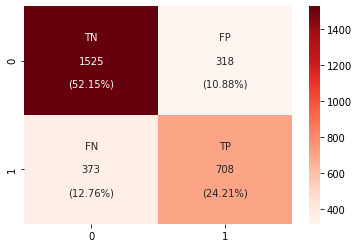

In [ ]:
# XGB predict on X_test, Y_test

y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

# Instantiate model
clf = XGBClassifier(
 # General Params
 booster='gbtree',
 silent=0,
 
 # Booster Params 
 learning_rate=0.1, 
 n_estimators=1000,
 max_depth=5,
 min_child_weight=0.8,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 reg_lambda=1,
 alpha=0,

 # Learning Task Params
 objective='binary:logistic',
 seed=27,
 eval_metric='error'
 ) 

# Train model
clf.fit(X_train, y_train)

# Predict 
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

print("XGBoost Model\n")

# print classification report
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n",)
print(metrics.classification_report(y_test, y_pred, digits=2))

# print accuracy score
print("Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_test, y_pred)*100))

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc, "\n\n")

# Generate pretty Confusion Matrix
result = confusion_matrix(y_test, y_pred)
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

## Decrease variance to improve TPs

XGBoost Model


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1843
           1       0.66      0.75      0.70      1081

    accuracy                           0.76      2924
   macro avg       0.75      0.76      0.75      2924
weighted avg       0.77      0.76      0.76      2924

Balanced Accuracy Score: 75.83%
AUC: 0.758 




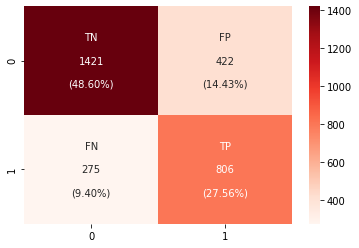

In [ ]:
# XGB predict on X_test, Y_test

y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

# Instantiate model
clf = XGBClassifier(
 # General Params
 booster='gbtree',
 silent=0,
 
 # Booster Params 
 learning_rate=0.1, 
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1, #0.8
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 reg_lambda=3, # 1
 alpha=0, # 0

 # Learning Task Params
 objective='binary:logistic',
 seed=27,
 eval_metric='error'
 ) 

# Train model
clf.fit(X_train, y_train)

# Predict 
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

print("XGBoost Model\n")

# print classification report
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n",)
print(metrics.classification_report(y_test, y_pred, digits=2))

# print accuracy score
print("Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_test, y_pred)*100))

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc, "\n\n")

# Generate pretty Confusion Matrix
result = confusion_matrix(y_test, y_pred)
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

## Run XGB Train-Test-Validate

XGBoost Model


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1844
           1       0.71      0.60      0.65      1080

    accuracy                           0.76      2924
   macro avg       0.75      0.73      0.73      2924
weighted avg       0.76      0.76      0.76      2924

Balanced Accuracy Score: 72.80%
AUC: 0.728 




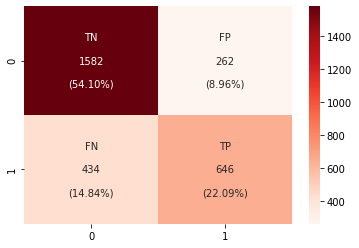

In [ ]:
# XGB predict on X_validate, Y_validate
X_test = X_valid
Y_test = Y_valid

# Learning rate = 0.1 and number of estimators = 1000
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

# Instantiate model
clf = XGBClassifier(
 # General Params
 booster='gbtree',
 silent=0,
 
 # Booster Params 
 learning_rate=0.1, 
 n_estimators=1000,
 max_depth=5,
 min_child_weight=0.8,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 reg_lambda=1,

 # Learning Task Params
 objective='binary:logistic',
 seed=27,
 eval_metric='error'
 ) 

# Train model
clf.fit(X_train, y_train)

# Predict 
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

print("XGBoost Model\n")

# print classification report
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n",)
print(metrics.classification_report(y_test, y_pred, digits=2))

# print accuracy score
print("Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_test, y_pred)*100))

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc, "\n\n")

# Generate pretty Confusion Matrix
result = confusion_matrix(y_test, y_pred)
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

## Export XGB Probabilities

In [ ]:
# convert prediction probabilities into a dataframe with index corresponding to Y_test df
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns = ['cwa_pred_prob_0', 'cwa_pred_prob_1'], index = Y_test.index)

# convert predicted labels into a dataframe with index corresponding to Y_test df
y_pred_df = pd.DataFrame(y_pred, columns = ['cwa_pred'], index = Y_test.index)

# join predicted labels with prediction probabilities
predictions = y_pred_df.join(y_pred_proba_df)

# left merge predicted values with model_data
analysis_df = predictions.merge(model_data, how='left', left_on=predictions.index, right_on=model_data.index)

# generate df of site predictions and probabilities
output_df = analysis_df[['da_number','cwa_pred','cwa_pred_prob_0','cwa_pred_prob_1']]

output_df.to_csv(r"/content/drive/MyDrive/Colab/altmodel/xgb_predictions.csv ")

## Plot Model Evaluation Curves

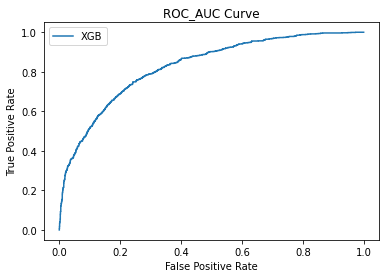

In [ ]:
# ROC AUC Curve - to compare across models
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='-', label='XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Precision-Recall Curve: ')

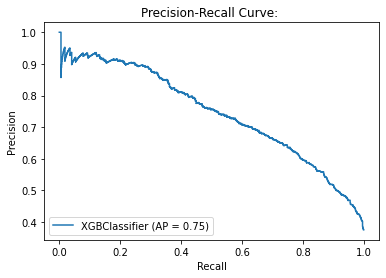

In [ ]:
# Precision Recall Curve
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve: ')

## Extract and Examine XGB FNs

In [ ]:
# convert predicted values into a dataframe with index corresponding to Y_test df
y_pred_df = pd.DataFrame(y_pred, columns = ['cwa_pred'], index = Y_test.index)

# left merge predicted values with model_data
analysis_df = y_pred_df.merge(model_data, how='left', left_on=y_pred_df.index, right_on=model_data.index)

# compute difference of predicted and actual class labels
analysis_df['diff'] = analysis_df['cwa_determination'] - analysis_df['cwa_pred'] 

# Extract samples that are incorrectly classified
# FNs are sites that have been determined as "under jurisdiction" by the model but have been deemed "non-jurisdicitional" after field assessments
# If prediction is correct, diff is 0 
# If prediction is FP,  diff is -1 
# If prediction is FN, diff is 1

xgb_fn_list = analysis_df['da_number'][analysis_df['diff'] == 1]
print("False Negatives:\n")
print(xgb_fn_list)

xgb_fn_list.to_csv(r"/content/drive/MyDrive/Colab/altmodel/FN-Analysis/xgb_fn.csv ")

False Negatives:

16          SAC-2010-00844
19      LRE-2017-00645-102
29          SAC-2019-01937
33      NAB-2017-01742-M30
34          LRC-2016-00904
               ...        
2883        SPN-2016-00169
2886        SAS-2006-01119
2898        LRC-2016-00537
2906    SWT-2017-00391-rbh
2917        SWG-2015-00202
Name: da_number, Length: 406, dtype: object


## Generate Feature Importance

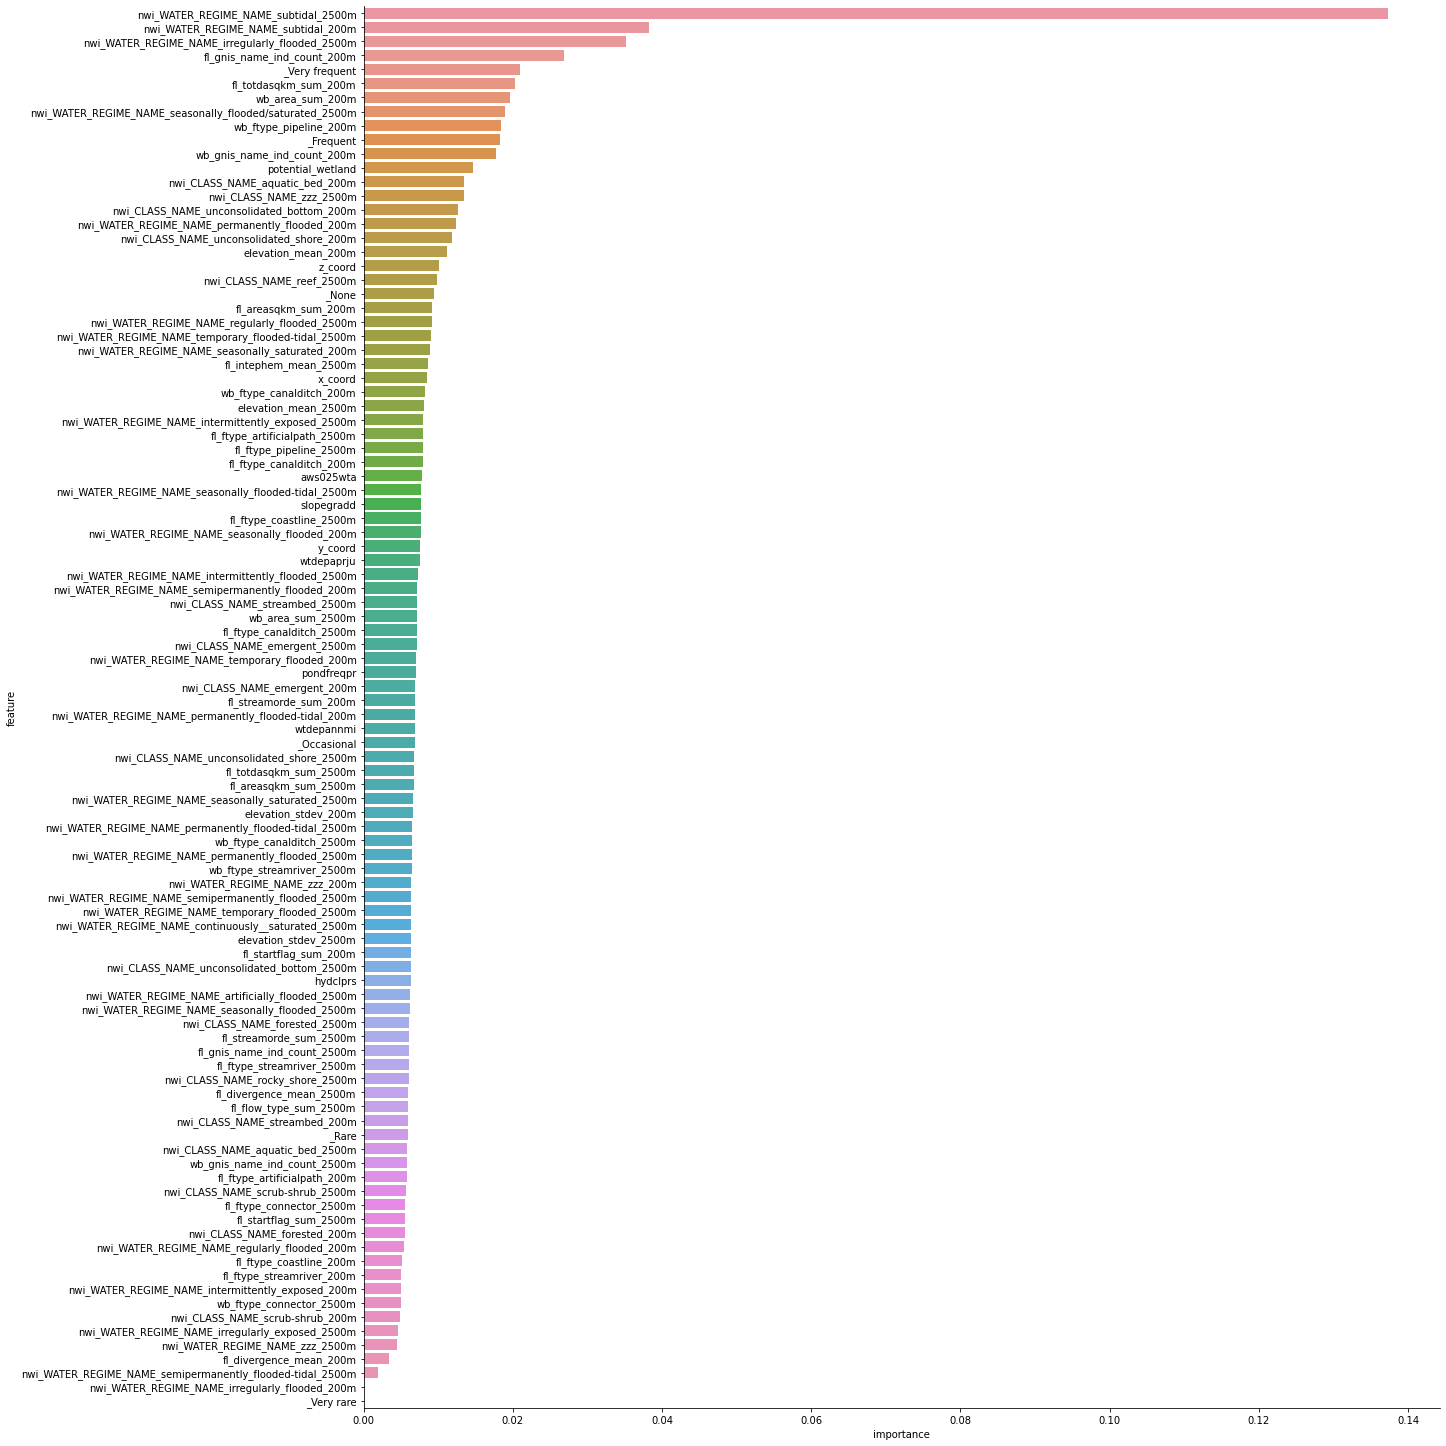

In [ ]:
# generate pretty feature importance
rfc_fi = pd.DataFrame({'feature':X_train.columns,'importance':clf.feature_importances_}).sort_values(by='importance',ascending=False)

sns.catplot(y='feature',x='importance',data=rfc_fi,kind='bar',aspect=1, height=20).set_yticklabels(rotation=0);

# Appendix


In [ ]:
# How to subset a dataframe

csv2 = csv1.loc[:, ['Acceleration', 'Pressure']]

csv2 = csv1[['Acceleration', 'Pressure']].copy()

#.loc[] helps keep the subsetting operation explicit and consistent.
#.loc[] always returns a copy so the original dataframe is never modified.

# When creating a new dataframe from the original, changing the new dataframe:
#  - Will change the original when scalar/slice indexing with .loc/.iloc is used to create the new dataframe.
#  - Will NOT change the original when boolean indexing with .loc, .query(), or .copy() is used to create the new dataframe

In [ ]:
# How to subset and rename columns
df2 = df[['B','D','F']].rename({'B':'X','D':'Y','F':'Z'}, axis=1)

In [ ]:
# How to split data by indices

test_data, test_labels = X[11500:], Y[11500:]
dev_data, dev_labels = X[10000:11500], Y[10000:11500]
train_data, train_labels = X[:10000], Y[:10000]
mini_train_data, mini_train_labels = X[:1500], Y[:1500]

In [ ]:
# How to Stratify Shuffle Split (single class/label)

# REPEATABLE STRATIFIED SHUFFLE TRAIN_TEST_SPLIT when predicting 8 classes

# Some classification problems do not have a balanced number of examples for 
# each class label. As such, it is desirable to split the dataset into train and
# test sets in a way that preserves the same proportions of examples in each 
# class as observed in the original dataset.

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.8, random_state=0)

for train_index, test_index in sss.split(X, Y): # sss.split returns indices to split data
    X_train, X_test = X.loc[train_index], X.loc[test_index] 
    Y_train, Y_test = Y.loc[train_index], Y.loc[test_index] 

In [ ]:
# How to Stratify Split (multiple classes/labels)

!pip install iterative-stratification

from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

msss = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

for train_index, test_index in msss.split(X, Y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X.loc[train_index], X.loc[test_index]
   Y_train, Y_test = Y.loc[train_index], Y.loc[test_index]


In [ ]:
# How to Encode categorical values

# Method 1
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
enc_df = pd.DataFrame(ohe.fit_transform(model_data[['district']]).toarray())
model_data = model_data.join(enc_df)
model_data.drop('district', axis=1, inplace=True)

# Method 2
cat_variables = ['district', 'drclassdcd']

for c in cat_variables:
  enc_df = pd.get_dummies(model_data[c], prefix='')
  model_data = model_data.join(enc_df)
  model_data.drop(c, axis=1, inplace=True)

In [ ]:
# How to impute nans in df

# check how many Nans are present
X.isnull().sum().sum() # will return number of NaNs

# impute with mean
for c in X.columns:
  # print (X[c].mean())
  X.fillna(value=X[c].mean(), inplace=True)

# verify that impute has succeeded
X.isnull().sum().sum() # must return zero

In [ ]:
# How to impute Nans at training time

from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, Y_train)

for X_test in [X_test_1, X_test_2, X_test_3]:
    # Impute each test item, then predict
    X_test_imp = imp.transform(X_test)
    print(X_test, '->', clf.predict(X_test_imp))

In [ ]:
# KNN: Imputing at Training Time

# Create imputer to replace missing values with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute training data
X_train_imp = imp.transform(X_train)

# Instantiate model
clf = KNeighborsClassifier(n_neighbors = 10)

# Train model
model = clf.fit(X_train_imp, Y_train)

# Impute test data
X_test_imp = imp.transform(X_test)

# Predict on imputed test data
Y_pred = model.predict(X_test_imp)

# print confusion matrix
result = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(result)

# print classification report
result1 = classification_report(Y_test, Y_pred)
print("Classification Report:",)
print (result1)

# print accuracy score
result2 = accuracy_score(Y_test,Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# XGBoost
  
# Create imputer to replace missing values with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute training data
X_train_imp = imp.transform(X_train)

# Instantiate model
clf = XGBClassifier(n_estimators=200)

# Train model
model = clf.fit(X_train_imp, Y_train)

# Impute test data
X_test_imp = imp.transform(X_test)

# Predict on imputed test data
Y_pred = model.predict(X_test_imp)

# print confusion matrix
result = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(result)

# print classification report
result1 = classification_report(Y_test, Y_pred)
print("\nClassification Report:",)
print (result1)

# print accuracy score
result2 = accuracy_score(Y_test,Y_pred)
print("Accuracy:",result2)

In [ ]:
# How to normalize data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Basic XGBoost Classifier

import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, Y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

In [ ]:
# Multiclass XGBoost Classifier

from sklearn.preprocessing import LabelEncoder 
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

lc = LabelEncoder() 
lc = lc.fit(y) 
lc_y = lc.transform(y)

model = XGBClassifier() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [ ]:
# Lat/Lon Feature Engineering
model_data['x_coord'] = np.cos(model_data['latitude']) * np.cos(model_data['longitude'])
model_data['y_coord'] = np.cos(model_data['latitude']) * np.sin(model_data['longitude'])
model_data['z_coord'] = np.sin(model_data['latitude'])

In [ ]:
# MODEL EVALUATION 

# print classification report
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n",)
print(metrics.classification_report(y_test, y_pred, digits=2))

# print accuracy score
print("Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_test, y_pred)*100))

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc, "\n\n")

# ROC AUC Curve - to compare across models
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='-', label='XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision Recall Curve
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve: ')


In [ ]:
# Generate pretty Classification Report
# print classification report
result1 = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n",)
# print (result1)
print(metrics.classification_report(Y_test, Y_pred, digits=2))

# print accuracy score
print("Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(Y_test, Y_pred)*100))

In [ ]:
# Generate pretty Confusion Matrix
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.0%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
# labels = [f"{v1}\n\n{v2}" for v1, v2 in
#           zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

In [ ]:
# generate pretty feature importance
rfc_fi = pd.DataFrame({'feature':X_train.columns,'importance':clf.feature_importances_}).sort_values(by='importance',ascending=False)
sns.catplot(y='feature',x='importance',data=rfc_fi,kind='bar',aspect=1).set_yticklabels(rotation=0);

In [ ]:
# to filter dataframe based on column value
df_new = df.iloc[np.where(df.<column-name>.isin(<column-name values>))] 

In [ ]:
# To extract list of FPs and FNs

real = np.array([1,0,0,1,1,1,1,1])
predicted = np.array([1,1,0,0,1,1,0,1])

diff = real-predicted
print('diff: ',diff)

# Correct is 0 
# FP is -1 
# FN is 1
print('Correctly classified: ', np.where(diff == 0)[0])
print('Incorrectly classified: ', np.where(diff != 0)[0])
print('False positives: ', np.where(diff == -1)[0])
print('False negatives: ', np.where(diff == 1)[0])

In [ ]:
# Class Balancing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## UNDERSAMPLING
# define undersample strategy method 1
undersample = RandomUnderSampler(sampling_strategy='majority')

# # define undersample strategy method 2
# undersample = RandomUnderSampler(sampling_strategy=0.5)

# fit and apply the transform
X_under, Y_under = undersample.fit_resample(X_train, Y_train)

## OVERSAMPLING
# define oversample strategy method 1
oversample = RandomOverSampler(sampling_strategy='minority')

# # define oversample strategy method 2
# oversample = RandomOverSampler(sampling_strategy=0.5)

# fit and apply the transform
X_over, Y_over = oversample.fit_resample(X_train, Y_train)

Counter({0: 173, 1: 173})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# estimate bias and variance
mse, bias, var = bias_variance_decomp(clf, X_train.to_numpy(), y_train, X_test.to_numpy(), y_test, loss='mse', random_seed=1)

# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

# Test